In [35]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib as mlt

### Understand the titanic data

In [36]:
df = pd.read_csv("Titanic-Dataset.csv")

In [37]:
df.shape

(891, 12)

In [38]:
df.sample(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
803,804,1,3,"Thomas, Master. Assad Alexander",male,0.42,0,1,2625,8.5167,NaN,C
252,253,0,1,"Stead, Mr. William Thomas",male,62.00,0,0,113514,26.5500,C87,S
56,57,1,2,"Rugg, Miss. Emily",female,21.00,0,0,C.A. 31026,10.5000,NaN,S
648,649,0,3,"Willey, Mr. Edward",male,NaN,0,0,S.O./P.P. 751,7.5500,NaN,S
365,366,0,3,"Adahl, Mr. Mauritz Nils Martin",male,30.00,0,0,C 7076,7.2500,NaN,S
785,786,0,3,"Harmer, Mr. Abraham (David Lishin)",male,25.00,0,0,374887,7.2500,NaN,S
373,374,0,1,"Ringhini, Mr. Sante",male,22.00,0,0,PC 17760,135.6333,NaN,C
66,67,1,2,"Nye, Mrs. (Elizabeth Ramell)",female,29.00,0,0,C.A. 29395,10.5000,F33,S
240,241,0,3,"Zabour, Miss. Thamine",female,NaN,1,0,2665,14.4542,NaN,C
395,396,0,3,"Johansson, Mr. Erik",male,22.00,0,0,350052,7.7958,NaN,S


In [39]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [40]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [41]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [42]:
df.duplicated().sum()

np.int64(0)

In [43]:
df.corr(numeric_only=True)['Survived']

PassengerId   -0.005007
Survived       1.000000
Pclass        -0.338481
Age           -0.077221
SibSp         -0.035322
Parch          0.081629
Fare           0.257307
Name: Survived, dtype: float64

### EDA: Univariate Analysis 
#### 1. Categorical Data

<Axes: xlabel='Survived'>

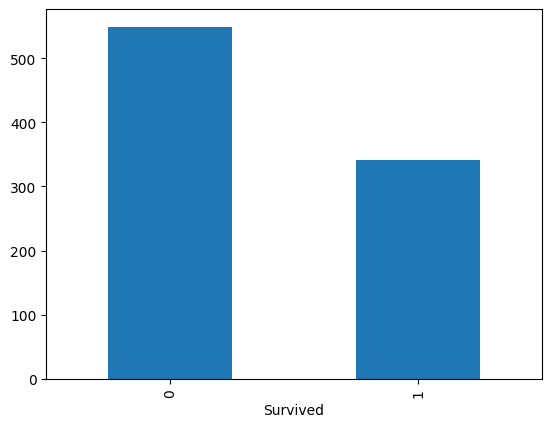

In [44]:
df['Survived'].value_counts().plot(kind="bar")

<Axes: ylabel='count'>

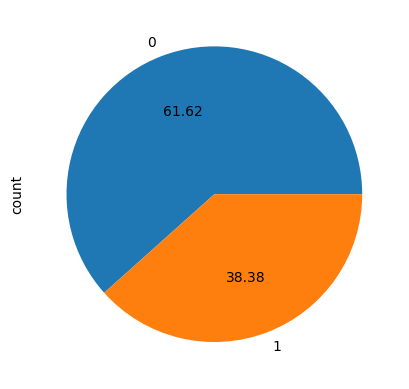

In [45]:
df['Survived'].value_counts().plot(kind="pie", autopct="%.2f")

Pclass
3    491
1    216
2    184
Name: count, dtype: int64


<Axes: ylabel='count'>

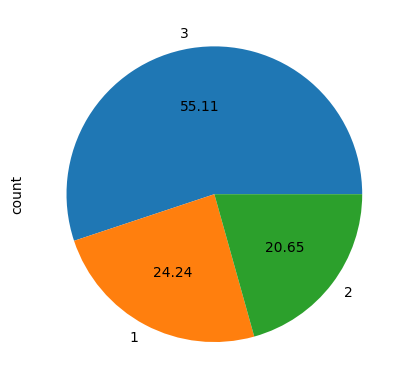

In [46]:
print(df['Pclass'].value_counts())
df['Pclass'].value_counts().plot(kind="pie", autopct="%.2f")

Sex
male      577
female    314
Name: count, dtype: int64


<Axes: ylabel='count'>

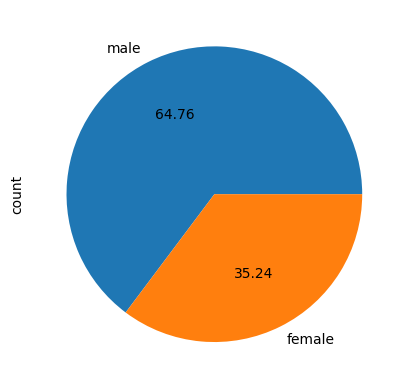

In [47]:
print(df['Sex'].value_counts())
df['Sex'].value_counts().plot(kind="pie", autopct="%.2f")

SibSp
0    608
1    209
2     28
4     18
3     16
8      7
5      5
Name: count, dtype: int64


<Axes: xlabel='SibSp'>

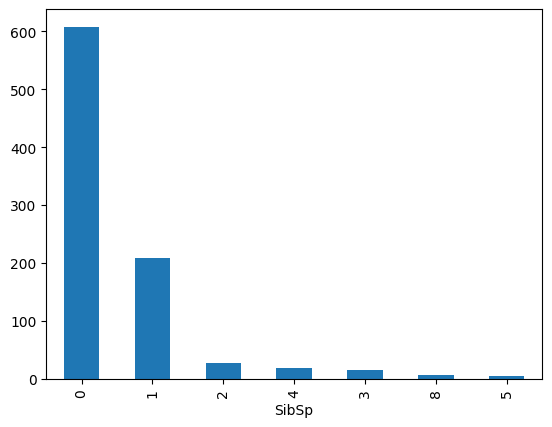

In [48]:
print(df['SibSp'].value_counts())
df['SibSp'].value_counts().plot(kind="bar")

Parch
0    678
1    118
2     80
5      5
3      5
4      4
6      1
Name: count, dtype: int64


<Axes: xlabel='Parch'>

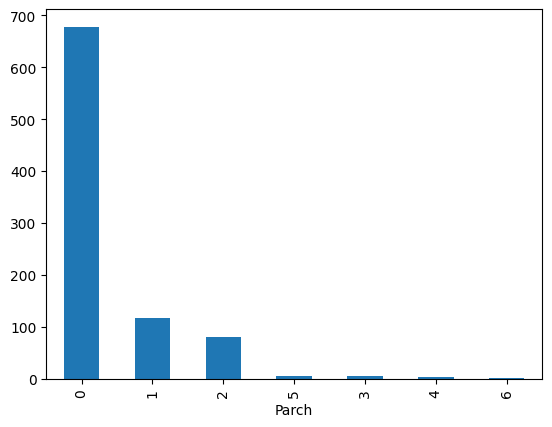

In [49]:
print(df['Parch'].value_counts())
df['Parch'].value_counts().plot(kind="bar")

Embarked
S    644
C    168
Q     77
Name: count, dtype: int64


<Axes: ylabel='count'>

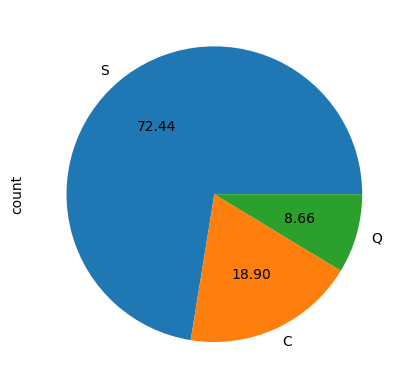

In [50]:
print(df['Embarked'].value_counts())
df['Embarked'].value_counts().plot(kind="pie", autopct="%.2f")

#### 2. Numerical Data

(array([ 54.,  46., 177., 169., 118.,  70.,  45.,  24.,   9.,   2.]),
 array([ 0.42 ,  8.378, 16.336, 24.294, 32.252, 40.21 , 48.168, 56.126,
        64.084, 72.042, 80.   ]),
 <BarContainer object of 10 artists>)

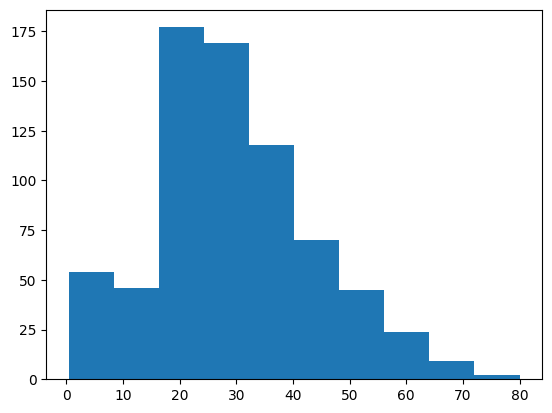

In [51]:
mlt.pyplot.hist(df['Age'])

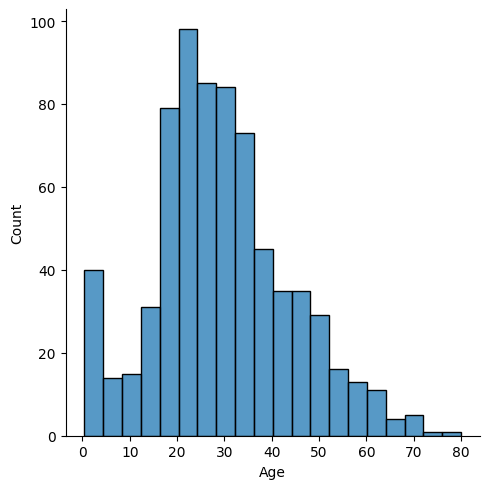

In [52]:
sns.displot(df['Age'])

<Axes: ylabel='Age'>

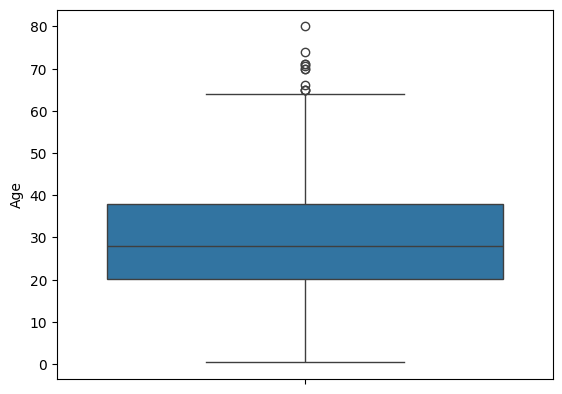

In [53]:
sns.boxplot(df['Age'])

In [56]:
print(df['Age'].min())
print(df['Age'].max())
print(df['Age'].skew())

0.42
80.0
0.38910778230082704
